# Data download

In [2]:
import os
from six.moves.urllib.request import urlretrieve

import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from six.moves import cPickle as pickle

In [3]:
url_base =  'http://csegroups.case.edu/sites/default/files/bearingdatacenter/files/Datafiles/'
download_folder = r'./data/download'

file_dictionary = {
        "1-A" : "98.mat",
        "1-B" : "99.mat",
        "1-C" : "100.mat",
        "2-A" : "119.mat",
        "2-B" : "120.mat",
        "2-C" : "121.mat",
        "3-A" : "186.mat",
        "3-B" : "187.mat",
        "3-C" : "188.mat",
        "4-A" : "223.mat",
        "4-B" : "224.mat",
        "4-C" : "225.mat",
        "5-A" : "106.mat",
        "5-B" : "107.mat",
        "5-C" : "108.mat",
        "6-A" : "170.mat",
        "6-B" : "171.mat",
        "6-C" : "172.mat",
        "7-A" : "210.mat",
        "7-B" : "211.mat",
        "7-C" : "212.mat",
        "8-A" : "131.mat",
        "8-B" : "132.mat",
        "8-C" : "133.mat",
        "9-A" : "198.mat",
        "9-B" : "199.mat",
        "9-C" : "200.mat",
        "10-A" : "235.mat",
        "10-B" : "236.mat",
        "10-C" : "237.mat"
        }

for key,filename in file_dictionary.items():
    dest_filename = os.path.join(download_folder, filename)
    if not os.path.exists(dest_filename):
        print('\nAttempting to download:', filename) 
        filename, _ = urlretrieve(url_base + filename, dest_filename)
        print('\nDownload Complete!')
        statinfo = os.stat(dest_filename)
        print(filename,':', statinfo.st_size)



Attempting to download: 98.mat

Download Complete!
./data/download\98.mat : 7742720

Attempting to download: 99.mat

Download Complete!
./data/download\99.mat : 15503928

Attempting to download: 100.mat

Download Complete!
./data/download\100.mat : 7770624

Attempting to download: 119.mat

Download Complete!
./data/download\119.mat : 2914248

Attempting to download: 120.mat

Download Complete!
./data/download\120.mat : 2917752

Attempting to download: 121.mat

Download Complete!
./data/download\121.mat : 2917752

Attempting to download: 186.mat

Download Complete!
./data/download\186.mat : 2931672

Attempting to download: 187.mat

Download Complete!
./data/download\187.mat : 2928192

Attempting to download: 188.mat

Download Complete!
./data/download\188.mat : 2931672

Attempting to download: 223.mat

Download Complete!
./data/download\223.mat : 2921232

Attempting to download: 224.mat

Download Complete!
./data/download\224.mat : 2931672

Attempting to download: 225.mat

Download Com

# Formatting arrays

In [4]:
Channels = ['DE','FE'] # Drive End , Fan End
Vib_mc = {} # multi-channel

for c in Channels:
    Sen_series = {}
    for key,filename in sorted(file_dictionary.items()):
        mtfilename = os.path.join(download_folder, filename)
        data = scipy.io.loadmat(mtfilename)
        for i in data:
            if  '_'+c+'_time' in i:
                Sen_series[key] = data[i]
    Vib_mc[c]= Sen_series

checking number of rows and statistics for each of 10 categories(1-10) and 3 HP (A,B,C) 

In [5]:
Channel = Channels[1]

minrow = Vib_mc[Channel][list(Vib_mc[Channel].keys())[0]].shape[0]

for key,array in sorted(Vib_mc[Channel].items()):
    print(key, "rows:", array.shape[0]
        , "avg:",round(np.mean(array),2)
        , "min:",round(np.min(array),2)
        , "max:",round(np.max(array),2))    
    if array.shape[0] < minrow:
        minrow = array.shape[0]

print("minimum row:",minrow )

1-A rows: 483903 avg: 0.03 min: -0.22 max: 0.32
1-B rows: 485063 avg: 0.03 min: -0.24 max: 0.31
1-C rows: 485643 avg: 0.03 min: -0.3 max: 0.38
10-A rows: 121991 avg: 0.03 min: -1.66 max: 1.84
10-B rows: 122281 avg: 0.03 min: -1.9 max: 1.98
10-C rows: 121991 avg: 0.03 min: -1.86 max: 2.09
2-A rows: 121410 avg: 0.03 min: -0.31 max: 0.38
2-B rows: 121556 avg: 0.03 min: -0.33 max: 0.39
2-C rows: 121556 avg: 0.03 min: -0.44 max: 0.48
3-A rows: 122136 avg: 0.03 min: -0.31 max: 0.35
3-B rows: 121991 avg: 0.03 min: -0.43 max: 0.47
3-C rows: 122136 avg: 0.03 min: -0.64 max: 0.65
4-A rows: 121701 avg: 0.03 min: -0.59 max: 0.6
4-B rows: 122136 avg: 0.03 min: -0.41 max: 0.4
4-C rows: 122136 avg: 0.03 min: -0.34 max: 0.41
5-A rows: 121991 avg: 0.03 min: -1.15 max: 0.97
5-B rows: 122136 avg: 0.03 min: -0.9 max: 0.96
5-C rows: 122917 avg: 0.03 min: -1.08 max: 0.9
6-A rows: 121846 avg: 0.03 min: -0.67 max: 0.63
6-B rows: 121846 avg: 0.03 min: -0.68 max: 0.62
6-C rows: 121701 avg: 0.03 min: -0.7 max: 0

quick visual check

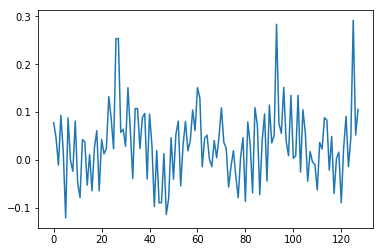

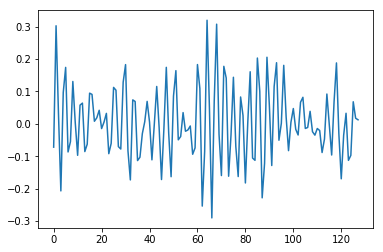

In [6]:
sample = Vib_mc['FE']['2-A']
plt.plot(sample[:128])
plt.show()
sample = Vib_mc['DE']['2-A']
plt.plot(sample[:128])
plt.show()

We need to create data samples with fixed length (2048 data points) for the 2 accelometers (DE and FE).

Let's take test samples without shift(augument) from the 1st half of the data from each file (categories x HP)

In [ ]:
X_test_temp = {}
sample_len = 2048
sample_test_cnt = 25

for key,sample in sorted(Vib_mc[Channels[0]].items()):
    X_test_temp[key] = np.concatenate((Vib_mc[Channels[0]][key][:sample_len*sample_test_cnt].reshape(sample_test_cnt,sample_len,1)
                            ,Vib_mc[Channels[1]][key][:sample_len*sample_test_cnt].reshape(sample_test_cnt,sample_len,1)
                            ),axis=2)

Next, training data with overlap (augmentation). Shifting 103 data points.

In [9]:
X_train_temp = {}
sample_train_cnt = 660
sample_train_shift = 103
for key,sample in sorted(Vib_mc[Channels[0]].items()):
    train_array = np.concatenate((Vib_mc[Channels[0]][key][sample_len*sample_test_cnt:sample_len*sample_test_cnt+sample_len].reshape(1,sample_len,1)
                                 ,Vib_mc[Channels[1]][key][sample_len*sample_test_cnt:sample_len*sample_test_cnt+sample_len].reshape(1,sample_len,1)
                                 ),axis=2)
    for i in range(sample_train_cnt-1):
        train_array = np.concatenate((train_array
                                 ,np.concatenate((
                                         Vib_mc[Channels[0]][key][sample_len*sample_test_cnt+sample_train_shift*(i+1):sample_len*sample_test_cnt+sample_len+sample_train_shift*(i+1)].reshape(1,sample_len,1)
                                        ,Vib_mc[Channels[1]][key][sample_len*sample_test_cnt+sample_train_shift*(i+1):sample_len*sample_test_cnt+sample_len+sample_train_shift*(i+1)].reshape(1,sample_len,1)
                                ),axis=2)),axis=0)
    X_train_temp[key] = train_array

Create training and test dataset with randomization, both with X and Y(lable...at this point not one-hot encoded yet).

For each, let user get A,B,C (HP) data by key. A, B, C contains 10 categories data for each HP. 

In [11]:

def randomize(dataset, labels):
  permutation = np.random.permutation(labels.shape[0])
  shuffled_dataset = dataset[permutation,:]
  shuffled_labels = labels[permutation]
  return shuffled_dataset, shuffled_labels

def create_dataset(X_temp):
    X = {"A":np.empty((0,sample_len,2),float),"B":np.empty((0,sample_len,2),float),"C":np.empty((0,sample_len,2),float)}
    Y = {"A":np.empty((0,1),int),"B":np.empty((0,1),int),"C":np.empty((0,1),int)}
    for key,sample in sorted(X_temp.items()):
        X[key.split(sep="-")[1]]=np.concatenate((X[key.split(sep="-")[1]],sample),axis=0)
        y = np.empty(len(sample),int)
        y.fill(key.split(sep="-")[0])
        y = y.reshape((len(sample),1))
        Y[key.split(sep="-")[1]]=np.concatenate((Y[key.split(sep="-")[1]],y),axis=0)
    #shuffling
    for key,samplearray in sorted(X.items()):
        X[key],Y[key] = randomize(samplearray,Y[key])
    return X,Y

X_test,Y_test = create_dataset(X_test_temp) 
X_train,Y_train = create_dataset(X_train_temp)

dataset D contains all. Vertically stack A, B and C and shuffle.

In [12]:
X_test["D"],Y_test["D"] = randomize(np.vstack((X_test["A"],X_test["B"],X_test["C"]))
    ,np.vstack((Y_test["A"],Y_test["B"],Y_test["C"])))

X_train["D"],Y_train["D"] = randomize(np.vstack((X_train["A"],X_train["B"],X_train["C"]))
    ,np.vstack((Y_train["A"],Y_train["B"],Y_train["C"])))

Saving the dataset as pickle format

In [13]:

pickle_file = os.path.join('./data/', 'ABCD_Datasets.pickle')

try:
  f = open(pickle_file, 'wb')
  save = {
    'train_datasets': X_train,
    'train_labels': Y_train,
    'test_datasets': X_test,
    'test_labels': Y_test,
    }
  pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print('Unable to save data to', pickle_file, ':', e)
  raise

statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)


Compressed pickle size: 1346930161
